# Rechnerübungen zur Vorlesung "Datamining in der Bioinformatik"

Veranstalter: **Peter Meinicke** </br>
Abgabe durch: **Kruse**

## Blatt 2: Hauptkomponentenanalyse (PCA)

### Aufgabe 1: Eigenvektorbestimmung
Wiederhole das Experiment aus Aufgabe 3 von Blatt 1

#### a)

generiere die Daten jetzt jedoch mit
`x data mat = np.random.rand(n points, n dims) @ a trans mat` und a trans `mat = np.array([[0.25, -0.433], [1.299, 0.75]])`. Was bebobachtest Du im Vergleich zu dem vorherigen Experiment?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_points = 2
n_dims = 100
x_data_mat = np.random.rand(n_points, n_dims)
mat = np.array([[0.25, -0.433], [1.299, 0.75]])
a_mat = mat @ x_data_mat

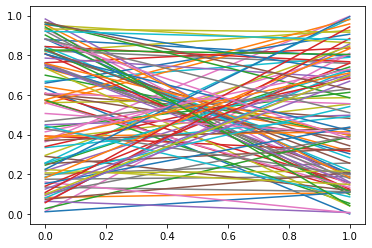

In [3]:
plot = plt.plot(x_data_mat)
plt.show()

In [4]:
np.mean(x_data_mat[0]), np.mean(x_data_mat[1])

(0.518496813984989, 0.4746750222037209)

In [5]:
np.var(x_data_mat[0]), np.var(x_data_mat[1])

(0.09219240697172548, 0.08902630347458437)

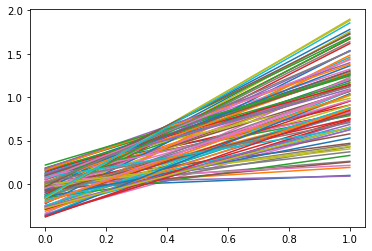

In [6]:
plot = plt.plot(a_mat)
plt.show()

In [7]:
np.mean(a_mat[0]), np.mean(a_mat[1])

(-0.07591008111796384, 1.0295336280192913)

In [8]:
np.var(a_mat[0]), np.var(a_mat[1])

(0.024806686932886072, 0.18446397545588844)

In [9]:
a_mat[1] - a_mat[0]

array([0.6631851 , 1.14495043, 1.18058583, 0.82472994, 1.06080179,
       1.0237424 , 1.5673307 , 1.76093168, 1.05207384, 1.63527005,
       1.86326197, 1.14894444, 1.13483411, 1.78931917, 1.03905652,
       1.20295346, 0.97190206, 1.10009058, 1.28219113, 1.43298915,
       1.16570237, 0.21555538, 1.20526601, 0.74110865, 1.06190443,
       1.25262146, 1.15137692, 0.40772366, 1.95214016, 1.19782197,
       1.13594974, 1.71709826, 0.66657075, 0.78859249, 1.07790535,
       1.07884724, 1.29450129, 0.51401098, 0.81987443, 1.14347313,
       1.76353257, 1.76352221, 1.06211128, 0.99470403, 1.22039155,
       0.4460748 , 1.33335683, 1.00699501, 2.01963533, 0.94489154,
       0.1421386 , 0.89981924, 1.00562296, 1.79236896, 1.6344777 ,
       0.65582939, 0.7468017 , 0.27562463, 1.31103249, 0.93254803,
       1.34162144, 1.21929374, 0.48945977, 1.16537083, 0.07656108,
       0.32449899, 0.17623824, 0.5710062 , 0.47334538, 1.12714367,
       1.85242104, 1.26306472, 1.70417576, 1.04657384, 0.97376

**Antwort:**

- Wir können beobachten, dass nun alle "Bewegungen" positiv sind. War dass gefragt? 

--- 

#### b)

Betrachte als Alternative zu dem in Aufgabe 3 praktizierten Verfahren ein iteratives Schema mit folgenden zwei Schritten:
$$
\begin{align*}
\boldsymbol{w}_i  &= \boldsymbol{C} \boldsymbol{v}_{i - 1} \\
\boldsymbol{v}_i  &= \boldsymbol{w}_i /  || \boldsymbol{w}_{i} ||
\end{align*} 
$$

fur $i = 1, \dots, m.$ Wiederhole das gesamte Schema 10 Mal und beginne jeweils mit einem zufällig gewählten Richtungsvektor $v_0$. Was beobachtest Du fur eine passende Wahl von $m$? Wie läßt sich die Konvergenz des Verfahrens feststellen bzw. “monitoren”? Tip: fur das Skalarprodukt (`np.dot`) zweier Vektoren `a` und
`b`gilt:
$$
    a^T b = ||a|| ||b|| \cos \phi
$$
wobei $\phi$ den Winkel zwischen beiden Vektoren bezeichnet.

In [10]:
# C als Covarianz-Matrix
c_cov_mat = np.cov(x_data_mat, bias=True)

In [11]:
# Funktion
def iter_solve(initial_alpha, covar, iters):
    # startwert
    v_list, w_list = [], []
    v_vec = np.array([np.cos(initial_alpha), np.sin(initial_alpha)])
    v_vec.reshape(2, 1)
    v_list.append(v_vec)
    w_list.append(0)
    i = 1
    while i < iters:
        w_iter = covar @ v_vec
        v_vec_new = w_iter/np.linalg.norm(w_iter)
        v_list.append(v_vec_new)
        w_list.append(w_iter)
        v_vec = v_vec_new
        i += 1
    return v_vec, v_list, w_list

**Antwort:**

- Konvergenz festzustellen bei numerischen Verfahren wird meist dadurch gelöst, dass man eine Art Konvergenz-Kriterium festlegt.
- Generell würde ich hierbei unterstellen, dass Konvergenz (mathematisch-inkorrekt) besteht wenn:
$$
    \lim \limits_{n \to \infty} || \nabla f_n || = 0 
$$
also wenn die Gradienten Norm gegen Null konvergiert.
- In unserem Fall, vor allem da wir hier numerische sind, würde dies umformuliert wie folgt sein:
$$
    \lim \limits_{k \to \infty} \dfrac{f(x_{k+1}) - f(x_{k})}{\Delta x} = \varepsilon 
$$
wobei $\varepsilon$ eine beliebige kleine Konvergenz-Grenze.

In [12]:
# Test wann die Sache konvergiert
test0, v_0, w_0 = iter_solve(0, covar = c_cov_mat, iters = 500)
test1, v_1, w_1 = iter_solve(1, covar = c_cov_mat, iters = 500)
test2, v_2, w_2 = iter_solve(2, covar = c_cov_mat, iters = 500)
test3, v_3, w_3 = iter_solve(3, covar = c_cov_mat, iters = 500)
test4, v_4, w_4 = iter_solve(4, covar = c_cov_mat, iters = 500)
test5, v_5, w_5 = iter_solve(5, covar = c_cov_mat, iters = 500)
test6, v_6, w_6 = iter_solve(6, covar = c_cov_mat, iters = 500)
test7, v_7, w_7 = iter_solve(7, covar = c_cov_mat, iters = 500)
test8, v_8, w_8 = iter_solve(8, covar = c_cov_mat, iters = 500)
test9, v_9, w_9 = iter_solve(9, covar = c_cov_mat, iters = 500)

In [13]:
test0, test1, test2, test3, test4, test5, test6, test7, test8, test9

(array([ 0.75634761, -0.65416993]),
 array([-0.75634761,  0.65416993]),
 array([-0.75634761,  0.65416993]),
 array([-0.75634761,  0.65416993]),
 array([ 0.75634761, -0.65416993]),
 array([ 0.75634761, -0.65416993]),
 array([ 0.75634761, -0.65416993]),
 array([ 0.75634761, -0.65416993]),
 array([-0.75634761,  0.65416993]),
 array([-0.75634761,  0.65416993]))

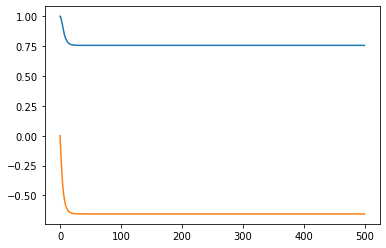

In [14]:
plot = plt.plot(v_0)
plt.show()

---

#### c)

Zeige schriftlich, dass die Summe der Eigenwerte der (geschätzten) Kovarianzmatrix, d.h. die Gesamtvarianz oder totale Varianz, dem mittleren quadratischen
Abstand der Datenpunkte vom Mittelwertsvektor $m$
$$
\dfrac{1}{n} \sum_{i=1}^{n} ||x_i - m||^2
$$

enspricht. Tip: die Summe der Eigenwerte entspricht der Summe der Diagonalelemente der Kovarianzmatrix! Was beschreibt dann dementsprechend ein einzelner Eigenwert der Kovarianzmatrix?

**Antwort:**

Wir führen die Matrix $A$, Vektor $Z$ und $\Sigma$ als die Varianz-Kovarianz Matrix von $Y$ ein.
$z$ sei der Vektor der Hauptkomponenten, $A$ sei die $m \times m$ Matrix in deren die Eigenvektoren beinhaltet sind.
$A$ sei definiert als: $A = \left[ a_1, \dots, a_m \right]$ und $z$ als $Z = A^T  Y$.

Die Varianz-Kovarianz von $Z$ sei hierbei $\Lambda$. Da wir wissen, dass die Varianzen der Hauptkomponenten gleich den Eigenwerten und sie unkorreliert sind, sei die Matrix wie folgt gegeben:
$$
\begin{equation*}
    \Lambda = 
    \begin{pmatrix}
        \lambda_1 & 0         & \dots & 0         \\
        0         & \lambda_2 & \dots & 0         \\
        \vdots    &           &       &           \\
        0         & 0         & \dots & \lambda_m \\ 
    \end{pmatrix}.
\end{equation*}
$$

Wir können nun etwas umschreiben und es vereinfachen durch: $Var(Z) = Var(A^T) = A^T \Sigma A$. 
Dadurch gilt:
$$
    \Lambda = A^T \Sigma A.
$$

Wir wissen auch, dass die Eigenwerte die Varianzen der jeweiligen unterliegenden Hauptkomponenten ist. Daher können wir das folgende behaupten:
$$
    \sum_{i = 1}^{m} Var(Z_i) = \sum_{i=1}^{m} \lambda_i = tr(\Lambda)
$$

Wir wissen aber auch, dass 
$$
    tr(\Lambda) = tr(A^T \Sigma A) = tr(\Sigma A A^T ) = tr(\Sigma) = \sum_{i=1}^{m} Var(Y_i)
$$
* gegeben, dass möglich ist $tr(AB) = tr(BA)$, wenn $AB$ quadratisch ist.

---

#### d) 

Wie könnte man ohne Verwendung der Funktion `np.linalg.eig` mehrere Eigenvektoren hintereinander mit dem iterativen Verfahren aus b) berechnen? Verwende dabei folgende Equivalenz
$$
C =  \sum_{i=1}^{d} \lambda_i u_i u_i^T .
$$

um den Anteil der Varianz in der schon gefundenen Richtung fur die Suche der nächsten Richtung zu eliminieren. Verwende dazu `np.outer` fur das äußere Produkt zwischen zwei Vektoren! Fasse die komplette Berechnung der Eigenwerte/vektoren in einer Funktion `power_method(x data mat, n evs)` zusammen, wobei n evs die vom Benutzer gewunschte Anzahl der “führenden” Eigenwerte/vektoren spezifiziert

In [15]:
# Power Method
def power_method(input, iters):
    #startwerte
    A = np.copy(input)
    x = np.ones((len(input), 1))
    i = 0
    while i < iters:
        x = np.dot(A, x)
        lambda_iter = abs(x).max()
        x = x/x.max()
        i += 1
    return x, lambda_iter


----

### Aufgabe 2: Versteckte Strukturen

Lade die Datensätze `hidden1.csv` und `hidden2.csv` aus dem Verzeichnis http://www.gobics.de/peter/DMBdata/, welche jeweils uber 10 Dimensionen (Matrixspalten) verfugen. Verwende dabei die Funktion `np.genfromtxt`. Verwende im Folgenden fur die Visualisierungen `pyplot` mit `import matplotlib.pyplot
as plt` als vorherigem Aufruf.

In [16]:
import pandas as pd

In [17]:
hidden1 = pd.read_csv("hidden1.csv", header=None)
hidden2 = pd.read_csv("hidden2.csv", header=None)

#### a) Histogramme: 

Untersuche die Verteilungen der einzelnen Dimensionen mittels der Funktion plt.hist und variiere die Anzahl der Histogrammbalken. Welcher Verteilung scheinen die Histogramme am ehesten zu entsprechen?

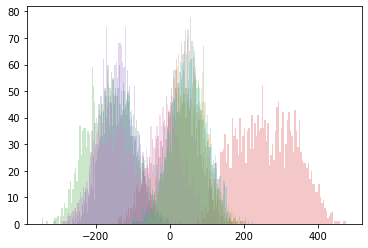

In [18]:
plt.hist(hidden1[0], bins=100, alpha=0.25, label="data1")
plt.hist(hidden1[1], bins=100, alpha=0.25, label="data2")
plt.hist(hidden1[2], bins=100, alpha=0.25, label="data2")
plt.hist(hidden1[3], bins=100, alpha=0.25, label="data2")
plt.hist(hidden1[4], bins=100, alpha=0.25, label="data2")
plt.hist(hidden1[5], bins=100, alpha=0.25, label="data2")
plt.hist(hidden1[6], bins=100, alpha=0.25, label="data2")
plt.hist(hidden1[7], bins=100, alpha=0.25, label="data2")
plt.hist(hidden1[8], bins=100, alpha=0.25, label="data2")
plt.hist(hidden1[9], bins=100, alpha=0.25, label="data2")
plt.show()

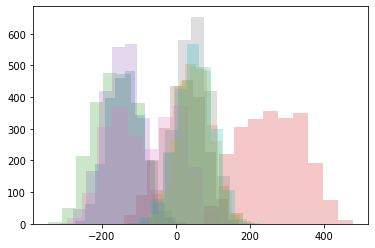

In [19]:
plt.hist(hidden1[0], bins=10, alpha=0.25, label="data1")
plt.hist(hidden1[1], bins=10, alpha=0.25, label="data2")
plt.hist(hidden1[2], bins=10, alpha=0.25, label="data2")
plt.hist(hidden1[3], bins=10, alpha=0.25, label="data2")
plt.hist(hidden1[4], bins=10, alpha=0.25, label="data2")
plt.hist(hidden1[5], bins=10, alpha=0.25, label="data2")
plt.hist(hidden1[6], bins=10, alpha=0.25, label="data2")
plt.hist(hidden1[7], bins=10, alpha=0.25, label="data2")
plt.hist(hidden1[8], bins=10, alpha=0.25, label="data2")
plt.hist(hidden1[9], bins=10, alpha=0.25, label="data2")
plt.show()

**Antwort:** 
- die jeweiligen Dimensionen scheinen Normalverteilungen zu folgen
- die jeweiligen Erwartungswerte und Varianzen der unterliegenden Verteilungen scheinen allerdings verschieden zu sein.

---


#### b) Scatterplots:

Visualisiere jeweils zwei Dimensionen der Datenpunkte aus `hidden1.csv` mit `plt.plot`. Schreibe ein Skript, das alle möglichen Kombinationen von zwei Dimensionen als separate Plots in einer Grafik darstellt. Tip: Integriere die verschiedenen Scatterplots mittels `plt.subplot`. Geben die Scatterplots mehr Auskunft uber die Gesamtverteilung und eventuell vorhandene Zusammenhänge/Strukturen in den Daten?

<Figure size 432x288 with 0 Axes>

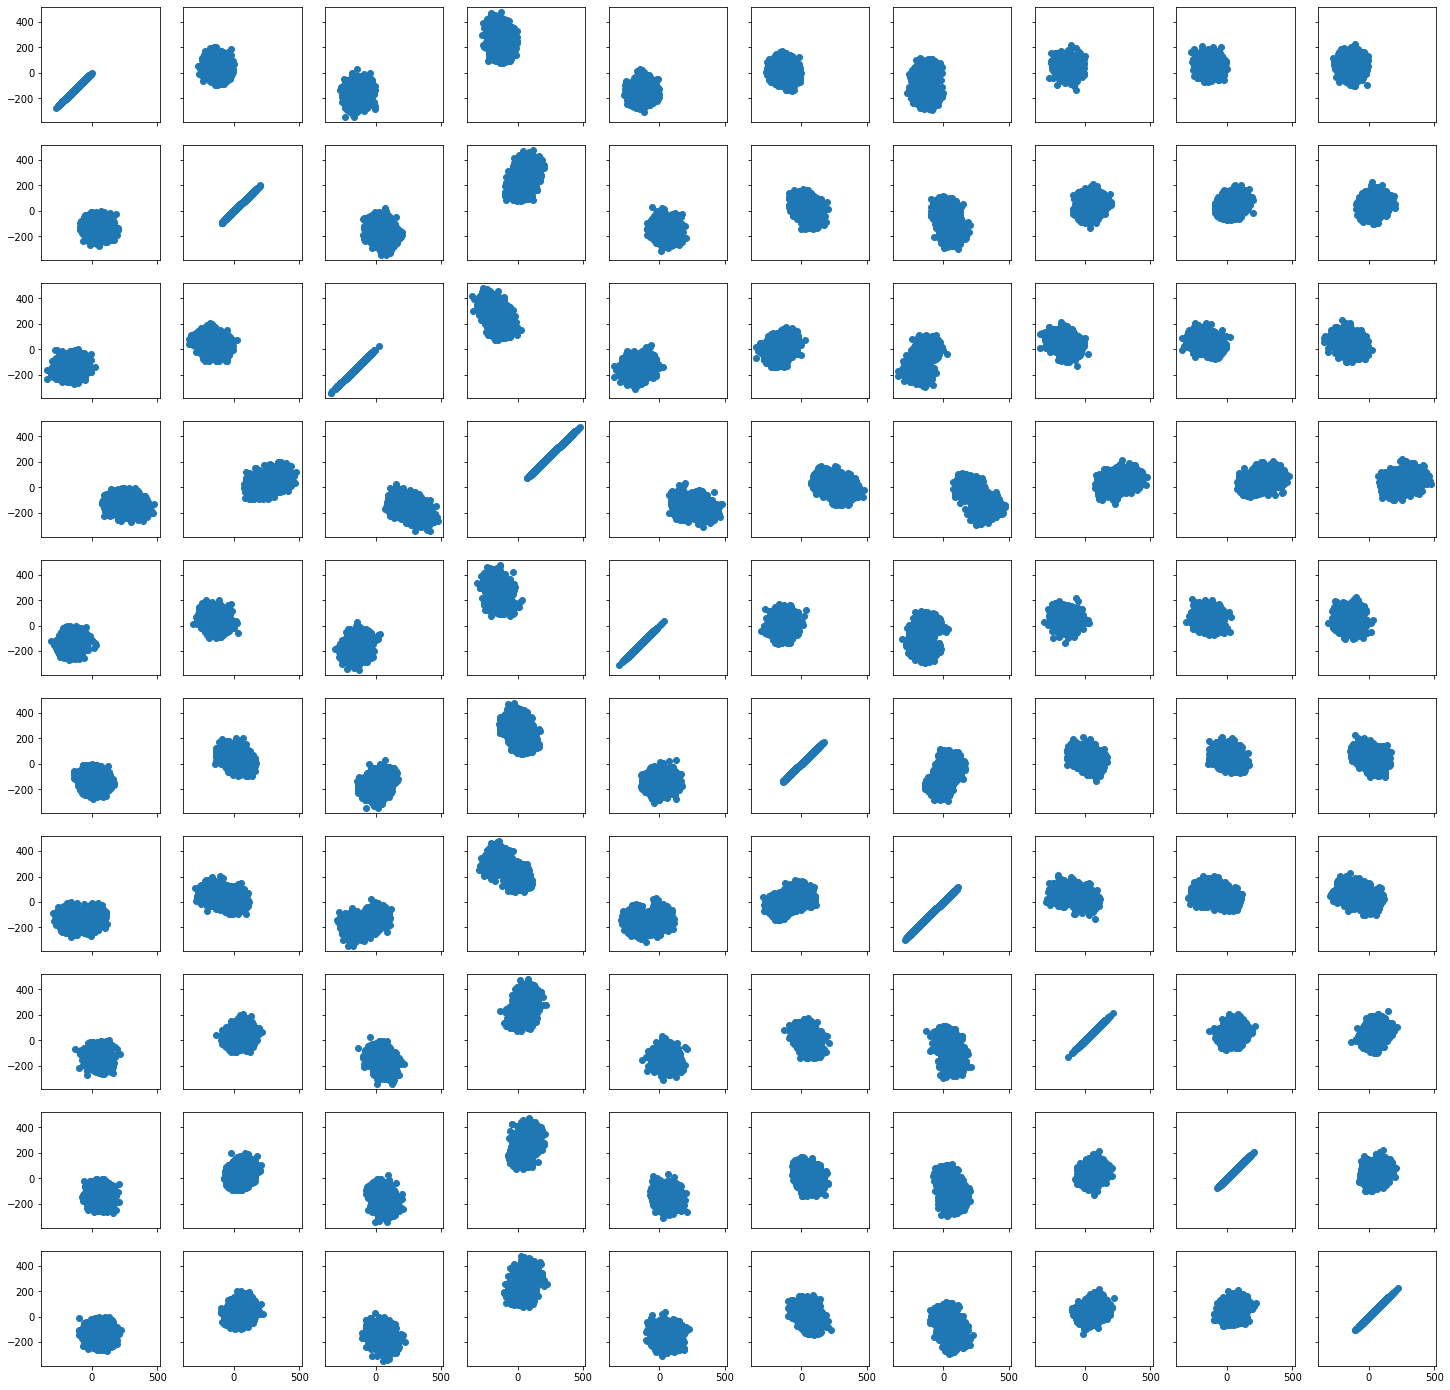

In [20]:
f = plt.figure()
f, axes = plt.subplots(nrows=10, ncols=10, sharex=True, sharey=True, figsize=(25,25))
for i in hidden1:
    for j in hidden1:
        axes[i][j].scatter(hidden1[i], hidden1[j])

plt.show()

#### c)  Eigenwertspektrum: 
Visualisiere die Eigenwerte der Kovarianzmatrix mit Balkendiagrammen (s. Funktion `plt.bar`). Achte auf eine von links nach rechts absteigende Reihenfolge der Eigenwerte. Wieviele relevante Hauptkomponentenrichtungen unter den Eigenvektoren der Kovarianzmatrix lassen sich vermuten?



In [65]:
cov_mat = np.cov(hidden1, rowvar=False)
eigenwerte = np.linalg.eig(cov_mat)
-np.sort(-(eigenwerte[0]/np.sum(eigenwerte[0])))

array([0.52603229, 0.10298202, 0.05107721, 0.04945149, 0.04768416,
       0.04660488, 0.04601179, 0.04497844, 0.04368947, 0.04148825])

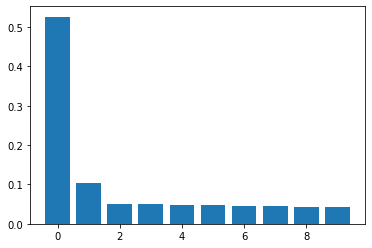

In [64]:
plt.bar(range(10), height = (-np.sort(-(eigenwerte[0]/np.sum(eigenwerte[0])))))
plt.show()

**Antwort:**
- Ein einfache Regel ist normalerweise 90% der Varianz sollten erklärt werden.
- Leider haben wir hier nur zwei Eigenwerte welche sich signifikant unterscheiden und die Summe beider entspricht in etwa ~65%
- Alternativ könnte man hier mit Cross-Validation arbeiten. 
- Meiner Meinung nach haben wir hier "nur" zwei wirklich brauchbare mit 52% und 10%

#### d) Hauptkomponenten:

Stelle die beiden Hauptkomponenten, die den größten Anteil der Varianz repräsentieren als Scatterplots dar. Zur Erinnerung: die Hauptkomponenten sind die Dimensionen, die aus der linearen Abbildung 
$$
    z = U^T x
$$

der mittelwertzentrierten Datenvariablen resultieren, wobei $U$ die Eigenvektoren der Kovarianzmatrix als Spalten enthält. D.h. die i-te Hauptkomponente entspricht dem Skalarprodukt $u_i^T x$.

In [77]:
# Eigenwerte berechnen
e_values, e_vectors = np.linalg.eigh(cov_mat)

# Sortieren
e_ind_order = np.flip(e_values.argsort())
e_values = e_values[e_ind_order]
e_vectors = e_vectors[:, e_ind_order] 

# Principal Achsen bestimmen
prin_comp = cov_mat @ e_vectors

In [80]:
prin_comp[0]

array([-923.83425158, 1768.75753632, -192.8802167 ,  -46.93209669,
        240.45420411,  653.36677587,  895.75313729,   38.74905039,
        203.41168213, -630.68151088])

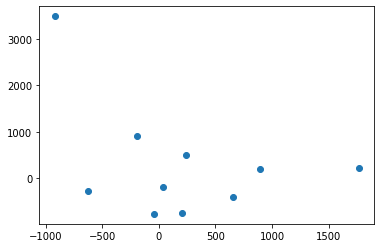

In [81]:
plt.scatter(prin_comp[0], prin_comp[1])